In [1]:
import os 
import tensorflow as tf 
import matplotlib
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
print(tf.__version__)
import subprocess

cmd="ls"
subprocess.call(cmd,shell="True")

2.7.0


0

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data_dir="/content/drive/MyDrive/Colab Notebooks/dataset"
categories=['with_mask','without_mask']

In [ ]:
from matplotlib.image import imread
X=[]
Y=[]
for image_filename in os.listdir(data_dir+"/"+categories[0]):
    img = imread(data_dir+"/"+categories[0]+'/'+image_filename)
    d1,d2,d3=img.shape
    X.append(d1)
    Y.append(d2)
for image_filename in os.listdir(data_dir+"/"+categories[1]):
    img = imread(data_dir+"/"+categories[1]+'/'+image_filename)
    d1,d2,d3=img.shape
    X.append(d1)
    Y.append(d2)
print(np.mean(X))
print(np.mean(Y))



283.9590399165145
279.3326376206627


C:\Users\srich\.conda\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


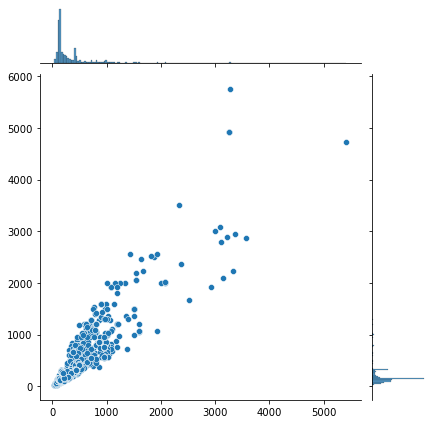

In [ ]:
import seaborn as sns

sns.jointplot(X,Y)

In [ ]:
print(np.median(X))
print(np.median(Y))

147.0
152.0


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(256, 256))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

C:\Users\srich\.conda\envs\ml\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
data = np.data = np.array(data, dtype="float32")
labels = np.array(labels)

(X_train,X_test,Y_train,Y_test)=train_test_split(data,labels,test_size=0.2,stratify=labels,random_state=1)

aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	
	horizontal_flip=True,
	fill_mode="nearest")


In [ ]:
image_shape=(256,256,3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
INIT_LR = 1e-4
EPOCHS = 20
BS = 32


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(2))
model.add(Activation('softmax'))
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
H = model.fit(
	aug.flow(X_train, Y_train, batch_size=BS),
	steps_per_epoch=len(X_train) // BS,
	validation_data=(X_test, Y_test),
	validation_steps=len(X_test) // BS,
	epochs=EPOCHS,
	callbacks=[early_stop])

Epoch 1/20
95/95 [==============================] - 244s 3s/step - loss: 0.4422 - accuracy: 0.8016 - val_loss: 0.2414 - val_accuracy: 0.9048
Epoch 2/20
95/95 [==============================] - 230s 2s/step - loss: 0.3174 - accuracy: 0.8780 - val_loss: 0.2340 - val_accuracy: 0.9074
Epoch 3/20
95/95 [==============================] - 267s 3s/step - loss: 0.2971 - accuracy: 0.8856 - val_loss: 0.1916 - val_accuracy: 0.9218
Epoch 4/20
95/95 [==============================] - 272s 3s/step - loss: 0.2816 - accuracy: 0.8945 - val_loss: 0.2200 - val_accuracy: 0.9140
Epoch 5/20
95/95 [==============================] - 268s 3s/step - loss: 0.2851 - accuracy: 0.8991 - val_loss: 0.1765 - val_accuracy: 0.9309
Epoch 6/20
95/95 [==============================] - 270s 3s/step - loss: 0.2601 - accuracy: 0.9110 - val_loss: 0.1702 - val_accuracy: 0.9361
Epoch 7/20
95/95 [==============================] - 266s 3s/step - loss: 0.2479 - accuracy: 0.9071 - val_loss: 0.1654 - val_accuracy: 0.9296
Epoch 8/20
95

In [ ]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

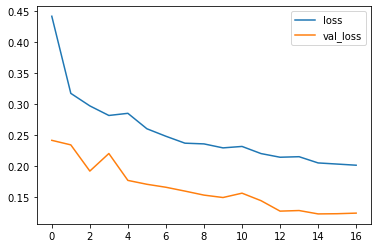

In [ ]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

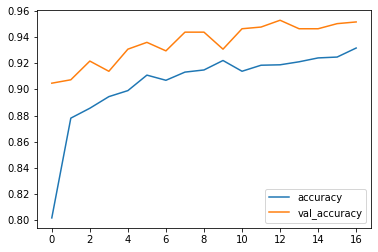

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred_idx=np.argmax(predictions,axis=1)
print(classification_report(Y_test.argmax(axis=1), pred_idx,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.93      0.97      0.95       383
without_mask       0.97      0.93      0.95       384

    accuracy                           0.95       767
   macro avg       0.95      0.95      0.95       767
weighted avg       0.95      0.95      0.95       767



In [ ]:
print(confusion_matrix(Y_test.argmax(axis=1), pred_idx))

[[373  10]
 [ 27 357]]


In [ ]:
model.save('mask-det.model',save_format='h5')

In [ ]:
img=load_img('C:\\Users\\srich\\Documents\\Frame.png',target_size=image_shape)
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)
x=model.predict(img)
print(x)

[[0.74049234 0.25950772]]
